# Ejercicio Práctico: Carga, Exploración, Limpieza y Visualización Básica de un Dataset


## 1. Acerca del DataSet
El conjunto de datos Dirty Cafe Sales contiene 10 000 filas de datos sintéticos que representan las transacciones de venta en una cafetería. Este conjunto de datos está intencionadamente "sucio", con valores faltantes, datos inconsistentes y errores introducidos para proporcionar un escenario realista para la limpieza de datos y el análisis exploratorio de datos (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizamos el DataSet

In [3]:
df = pd.read_csv('../data/dirty_cafe_sales.csv')
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


### Inspección inicial del DataSet

##### Revisar dimensiones (shape)

In [4]:
df.shape

(10000, 8)

#####  Inspeccionar tipos de datos y nulos (info)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


## 2. Duplicados

In [6]:
num_duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 0


## 3. Corregir las columnas 

### Corregir la columna Quantity: Convertir a Numeric

In [7]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Quantity'].dtype

dtype('float64')

### Correguir la columna Price Per Unit: Convertir a Numeric

In [8]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Price Per Unit'].dtype

dtype('float64')

### Corregir la columna Total Spent: Convertir a Numeric, para modificar ese "ERROR" que nos mostraba al principio a NaN

In [9]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Total Spent'].dtype
df.head(3)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19


### Corregir la columna Transaction Date: Convertir a Datatime

In [10]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Transaction Date'].dtype

dtype('<M8[ns]')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


##### Hago un df.info() para comprobar si realmente han funcionado los cambios de tipos de columnas y como se puede observar en el apartado de "dtypes" vemos que ahora nos muestra:
##### - datetime64(1), float64(3), object(4) y no "object(8)" como al principio.

In [12]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3.0,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,NaN,2023-12-02


### Valores Nulos (Missing Data)
Calculamos el conteo y el porcentaje de nulos.

In [13]:
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Nulos_Conteo': null_counts,
    'Nulos_Porcentaje': null_percentages
}).sort_values(by='Nulos_Porcentaje', ascending=False)

print("Resumen de Valores Nulos:")
print(null_info[null_info['Nulos_Conteo'] > 0])

Resumen de Valores Nulos:
                  Nulos_Conteo  Nulos_Porcentaje
Location                  3265             32.65
Payment Method            2579             25.79
Price Per Unit             533              5.33
Total Spent                502              5.02
Quantity                   479              4.79
Transaction Date           460              4.60
Item                       333              3.33


In [14]:
df['Location'].value_counts()

Location
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

In [15]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

## 4. Limpieza y Normalización

Eliminamos las filas con valor NaN en las variables de cálculo

In [16]:
cols_a_eliminar = ['Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Date']
df.dropna(subset=cols_a_eliminar, inplace=True)

Imputamos 'Desconocido' en las columnas con alta missingness, en este caso las columnas 'Payment Method' y 'Location'

In [23]:
# Primero, unificamos 'error' y 'unknown' a 'desconocido'
df['Location'] = df['Location'].replace(['error', 'unknown'], 'desconocido')
df['Payment Method'] = df['Payment Method'].replace(['error', 'unknown'], 'desconocido')
df['Item'] = df['Item'].replace(['error', 'unknown'], 'desconocido')

# Luego, imputamos NaN y aplicamos el formato de título (Mayúscula Inicial)
df['Location'] = df['Location'].fillna('desconocido').str.title()
df['Payment Method'] = df['Payment Method'].fillna('desconocido').str.title()
df['Item'] = df['Item'].str.title()

In [18]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Desconocido,2023-03-31
...,...,...,...,...,...,...,...,...
9992,TXN_2739140,Smoothie,4.0,4.0,16.0,Unknown,In-Store,2023-07-05
9994,TXN_7851634,Unknown,4.0,4.0,16.0,Desconocido,Desconocido,2023-01-08
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Desconocido,Unknown,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Desconocido,2023-03-02


# Visualizaciones

### 3.4 Visualizaciones básicas
Este histograma nos dice cómo se comporta el gasto de los clientes.

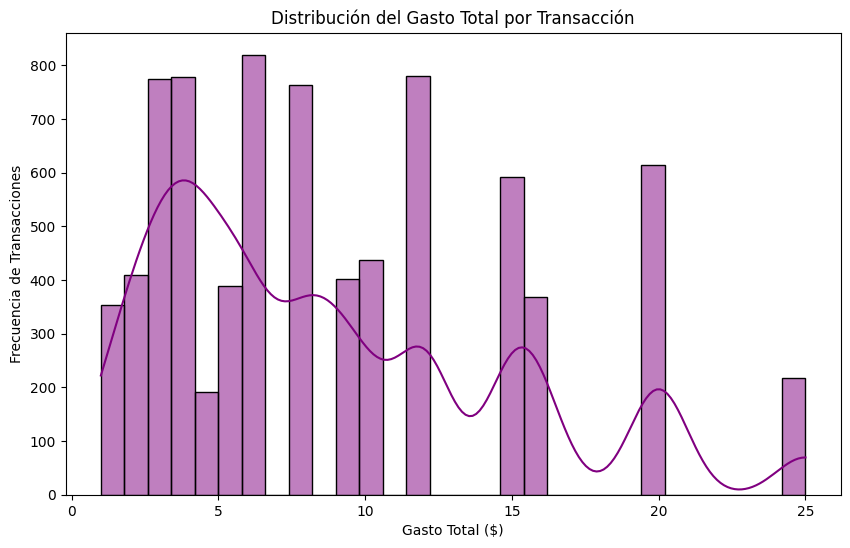

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spent'], bins=30, kde=True, color='purple')
plt.title('Distribución del Gasto Total por Transacción')
plt.xlabel('Gasto Total ($)')
plt.ylabel('Frecuencia de Transacciones')
plt.show()

### Top 10 Productos Más Vendidos
Este gráfico identifica los productos que generan más volumen de ventas.

C:\Users\ruben\AppData\Local\Temp\ipykernel_11700\866342999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')


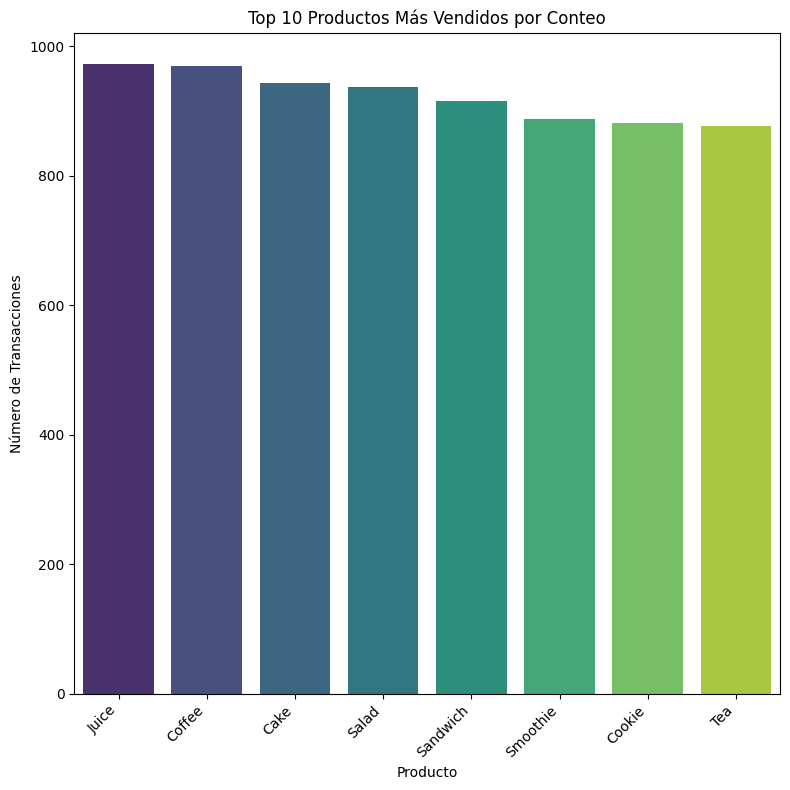

In [ ]:
plt.figure(figsize=(8, 8))

top_items = df['Item'].value_counts().nlargest(8)
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')
plt.title('Top 10 Productos Más Vendidos por Conteo')
plt.xlabel('Producto')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El siguiente gráfico, nos permite analizar la tendencia de las ventas a lo largo del tiempo.

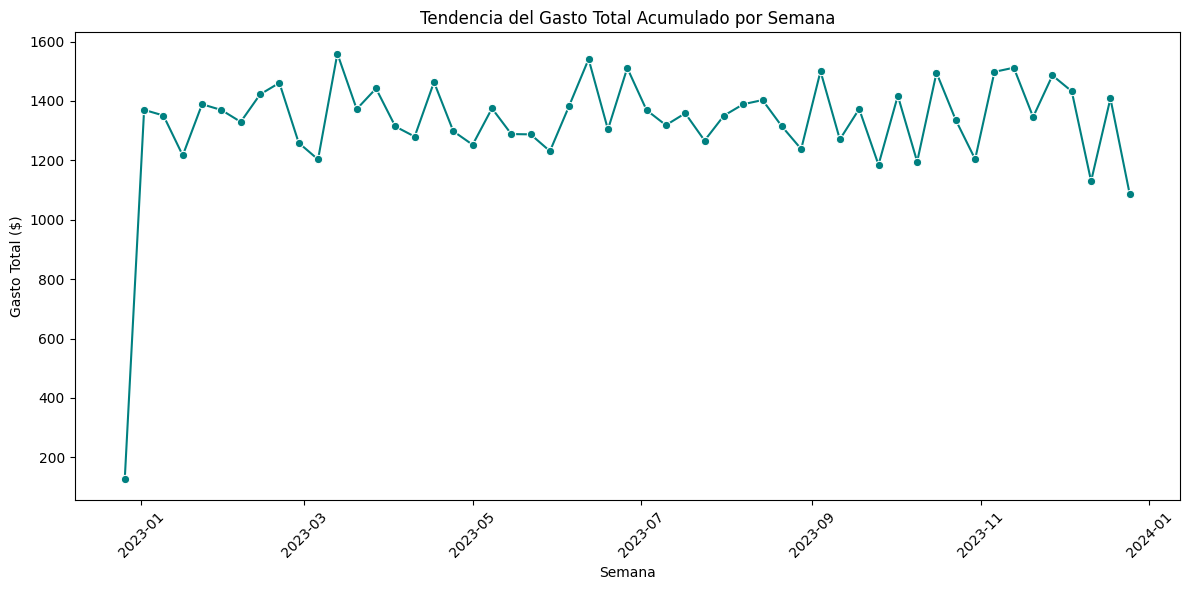

In [ ]:
# 1. Creamos la columna 'Semana' para agrupar
df['Semana'] = df['Transaction Date'].dt.to_period('W')

# 2. Agrupamos por semana y calculamos el gasto total promedio
# Usaremos la suma del gasto total por semana para ver el volumen.
ventas_semanales = df.groupby('Semana')['Total Spent'].sum().reset_index()

# Convertir el Period a timestamp para plotear
ventas_semanales['Fecha_Plot'] = ventas_semanales['Semana'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_semanales, x='Fecha_Plot', y='Total Spent', marker='o', color='teal')
plt.title('Tendencia del Gasto Total Acumulado por Semana')
plt.xlabel('Semana')
plt.ylabel('Gasto Total ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ¿Qué conclusiones hemos podido sacar con estas gráficas?

1. Concentración del Gasto: La distribución de la variable Total Spent está fuertemente sesgada a la derecha, indicando que la gran mayoría de las transacciones son de bajo valor. Solo unas pocas transacciones son outliers de alto valor.

2. Productos Estrella: Los productos de consumo básico, Coffee y Tea, dominan las ventas en términos de conteo de transacciones (frecuencia).

3. Tendencia Temporal: El análisis de la Serie de Tiempo del gasto total semanal muestra que las ventas se mantuvieron relativamente estables, aunque se observan picos y valles que podrían indicar cierta estacionalidad o promociones puntuales.

### 3.5 Conclusiones Exploratorias
Resumen de las Características del Dataset
El conjunto de datos Dirty Cafe Sales se analizó para comprender las transacciones de venta. Inicialmente contenía 10,000 filas y 8 columnas. Tras la limpieza de tipos de datos (object a float64 y datetime64) y la eliminación de registros irrecuperables, el dataset final cuenta con 7893 filas y 9 columnas

### Cambios Aplicados Durante la Limpieza del Dataset
Los cambios realizados durante la limpieza fueron esenciales para transformar el dataset inconsistente en un formato apto para el análisis de ventas. A continuación, se detalla el proceso:

1. Corrección de Tipos de Datos (Type Casting)
Las variables de cálculo (Quantity, Price Per Unit, Total Spent) se convirtieron al tipo numérico (float64). Paralelamente, la variable Transaction Date se transformó al tipo de tiempo (datetime64).

Resultado: Al forzar el tipo numérico, se expusieron explícitamente los errores de formato ('ERROR', strings anómalos) presentes en las columnas, los cuales fueron automáticamente convertidos a valores nulos (NaN) para su posterior tratamiento.

2. Tratamiento de Valores Nulos Críticos (Eliminación)
Se procedió a la eliminación de las filas con valores nulos (NaN) en las columnas fundamentales para la transacción: Item, Quantity, Price Per Unit, Total Spent, y Transaction Date.

Justificación: La falta de información crucial (qué se vendió, cuánto o cuándo) hacía que estos registros fueran irrecuperables e inútiles para el análisis de ventas.

Resultado: Se garantizó la integridad y coherencia de los datos transaccionales, asegurando que todos los cálculos posteriores (como el gasto total) se basen en registros completos.

3. Normalización Categórica e Imputación (Imputation)
Se aplicó una estrategia de imputación en las variables categóricas Location y Payment Method, sustituyendo los errores explícitos ('error', 'unknown') y los valores nulos (NaN) por la nueva categoría 'Desconocido'. Además, se aplicó la función .str.title() a todas las categorías.

Resultado: Se aseguró un conteo de categorías preciso y se conservó el máximo número de filas para el análisis segmentado, haciendo la base de datos más robusta.